In [81]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('./data/aggregate_201019.csv')
target = 'reuse'
IDcol = 'project'
train.dropna(inplace=True)
train.pop('maven_release')
train.pop('release')

0        1.0.0
1          0.7
2       2.5.23
3       2.3.14
4       2.5.23
        ...   
425      2.4.8
426      2.6.1
427    1.3.7-3
428    1.4.3-1
429        1.1
Name: release, Length: 270, dtype: object

In [82]:
train.head()

,project,maven_reuse,class_count,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,...,innerClassesQty_stdev,innerClassesQty_median,innerClassesQty_min,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max
0,aalto-xml,23.0,158,514.0,3.253165,11.642190,0.0,0.0,114.0,1744.0,...,0.342153,0.0,0.0,2.0,2833.0,17.930380,54.521441,3.0,0.0,423.0
1,airline,49.0,135,0.0,0.000000,0.000000,0.0,0.0,0.0,13.0,...,1.694885,0.0,0.0,17.0,105.0,0.777778,2.636332,0.0,0.0,17.0
2,akka-actor,208.0,2965,1248.0,0.420911,1.178230,0.0,0.0,21.0,8753.0,...,2.569414,0.0,0.0,48.0,8629.0,2.910287,9.747351,0.0,0.0,224.0
3,akka-remote,31.0,1182,339.0,0.296070,0.866344,0.0,0.0,8.0,2455.0,...,1.926408,0.0,0.0,34.0,2337.0,2.041048,6.947673,0.0,0.0,88.0
4,akka-slf4j,135.0,2965,1248.0,0.420911,1.178230,0.0,0.0,21.0,8753.0,...,2.569414,0.0,0.0,48.0,8629.0,2.910287,9.747351,0.0,0.0,224.0


In [83]:
train.describe()

,maven_reuse,class_count,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,parenthesizedExpsQty_average,...,innerClassesQty_stdev,innerClassesQty_median,innerClassesQty_min,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.0,270.000000,270.000000,270.000000,...,270.000000,270.0,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.000000
mean,390.096296,1911.559259,145.440741,0.115508,0.730389,0.0,0.0,13.029630,1110.829630,1.001637,...,1.193729,0.0,0.0,26.751852,2523.581481,1.940621,6.217874,0.157407,0.0,90.370370
std,915.616581,3751.182600,288.085441,0.256079,1.187118,0.0,0.0,18.677836,2361.408588,1.669122,...,1.299771,0.0,0.0,46.063814,6711.087858,2.839192,6.851407,0.791592,0.0,98.589588
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,34.250000,90.250000,1.000000,0.002633,0.062767,0.0,0.0,1.000000,40.000000,0.200360,...,0.447310,0.0,0.0,3.000000,93.000000,0.737415,2.416317,0.000000,0.0,19.250000
50%,71.500000,351.000000,16.500000,0.043478,0.415743,0.0,0.0,5.000000,171.000000,0.470914,...,0.819624,0.0,0.0,8.000000,494.500000,1.170127,4.688075,0.000000,0.0,45.500000
75%,400.500000,1249.500000,98.750000,0.118179,0.871208,0.0,0.0,21.000000,776.500000,1.060433,...,1.692361,0.0,0.0,25.000000,1747.000000,2.323175,7.430448,0.000000,0.0,140.750000
max,7388.000000,14013.000000,1248.000000,3.253165,11.642190,0.0,0.0,114.000000,20263.000000,13.600000,...,12.969737,0.0,0.0,358.000000,88339.000000,36.071429,58.773966,8.500000,0.0,599.000000


In [84]:
np.nanpercentile(train['maven_reuse'], [20, 40, 60, 80])

array([ 29. ,  50.6, 141. , 446.4])

In [85]:
np.nanpercentile(train['maven_reuse'], [10, 20, 30, 40, 50, 60, 70, 80,85, 90, 92,95, 97, 99])

array([  19.  ,   29.  ,   39.  ,   50.6 ,   71.5 ,  141.  ,  283.3 ,
        446.4 ,  557.65,  780.2 ,  964.12, 1541.7 , 3066.38, 5120.27])

In [86]:
def f(x):
    arr = [13, 36, 77.6, 369]
    for i in range(len(arr)+1):
        if i == len(arr):
            return int(i)
        if x['maven_reuse']<arr[i]:
            return int(i) 
train['reuse_5'] = train.apply(f, axis=1)

<AxesSubplot:>

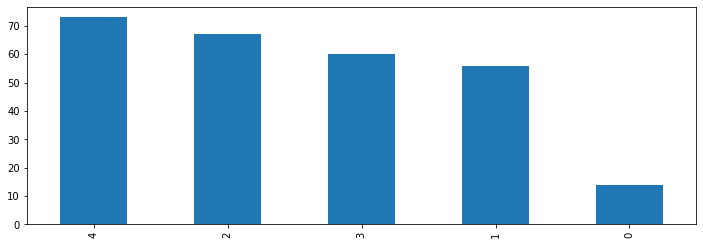

In [87]:
train.reuse_5.value_counts().plot(kind='bar')

In [143]:
def f(x):
    arr = [29, 50.6, 160, 600.2,964.12, 3066.38]
    for i in range(len(arr)+1):
        if i == len(arr):
            return int(i)
        if x['maven_reuse']<arr[i]:
            return int(i) 
train['reuse_10'] = train.apply(f, axis=1)

<AxesSubplot:>

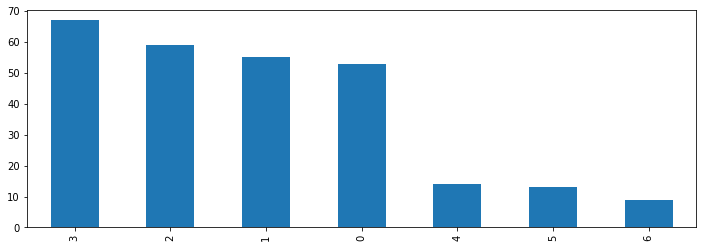

In [144]:
train.reuse_10.value_counts().plot(kind='bar')

In [145]:
train.corr()

,maven_reuse,class_count,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,parenthesizedExpsQty_average,...,innerClassesQty_min,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max,reuse_5,reuse_10
maven_reuse,1.000000,0.067645,0.049793,0.015783,0.060459,NaN,NaN,0.042354,0.021601,-0.029130,...,NaN,0.128357,0.002292,-0.052297,0.012527,-0.059933,NaN,0.128488,0.464741,0.696499
class_count,0.067645,1.000000,0.811498,-0.076769,-0.043645,NaN,NaN,0.272665,0.826183,-0.126327,...,NaN,0.613517,0.716399,-0.108734,-0.072929,-0.068203,NaN,0.429550,0.353192,0.233680
synchronizedMethodsQty_sum,0.049793,0.811498,1.000000,0.224417,0.221227,NaN,NaN,0.465641,0.823980,0.041368,...,NaN,0.526516,0.561671,-0.006965,0.075121,-0.065984,NaN,0.498538,0.271267,0.189840
synchronizedMethodsQty_average,0.015783,-0.076769,0.224417,1.000000,0.884922,NaN,NaN,0.602704,0.061724,0.527772,...,NaN,-0.050824,-0.008717,0.460243,0.567364,0.236132,NaN,0.307684,-0.062721,-0.043374
synchronizedMethodsQty_stdev,0.060459,-0.043645,0.221227,0.884922,1.000000,NaN,NaN,0.846406,0.051752,0.398344,...,NaN,-0.033637,0.008715,0.362895,0.507978,0.124134,NaN,0.349230,-0.061226,-0.025270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comparisonsQty_median,-0.059933,-0.068203,-0.065984,0.236132,0.124134,NaN,NaN,-0.006477,0.002014,0.341940,...,NaN,-0.103525,0.060269,0.718048,0.426668,1.000000,NaN,0.008872,-0.063627,-0.103920
comparisonsQty_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comparisonsQty_max,0.128488,0.429550,0.498538,0.307684,0.349230,NaN,NaN,0.468308,0.527453,0.254402,...,NaN,0.352718,0.420985,0.308803,0.633859,0.008872,NaN,1.000000,0.141752,0.158595
reuse_5,0.464741,0.353192,0.271267,-0.062721,-0.061226,NaN,NaN,0.002322,0.251325,-0.123053,...,NaN,0.269840,0.178692,-0.074034,-0.065438,-0.063627,NaN,0.141752,1.000000,0.885865


In [ ]:
[29, 50.6, 283.3, 780.2, 1541.7, 3066.38] 
0.736068
[29, 50.6, 160, 557.65, 3066.38, 5120.27]
0.652016
[29, 50.6, 160, 780.2, 1541.7, 3066.38, 5120.27]
0.740948

Here we realise that the less reusable projects need to be put in bigger more general groups and the higher level reuse projects require that we be more specific in the way we classify them => this for correlation to increase

In [16]:
print(len(train['reuse_5']))

430


In [17]:
for i in train['reuse_5']:
    print(i)

1.0
2.0
3.0
1.0
3.0
3.0
3.0
1.0
0.0
0.0
2.0
3.0
1.0
0.0
0.0
1.0
1.0
2.0
2.0
2.0
1.0
nan
0.0
3.0
3.0
2.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
3.0
2.0
nan
1.0
1.0
1.0
3.0
nan
0.0
2.0
1.0
1.0
1.0
3.0
2.0
2.0
2.0
0.0
nan
nan
1.0
0.0
nan
nan
nan
1.0
nan
3.0
0.0
0.0
3.0
2.0
2.0
0.0
3.0
2.0
2.0
1.0
2.0
nan
3.0
3.0
0.0
1.0
1.0
1.0
1.0
3.0
2.0
2.0
nan
nan
2.0
2.0
1.0
1.0
2.0
2.0
3.0
0.0
nan
0.0
0.0
nan
0.0
1.0
0.0
1.0
1.0
2.0
nan
nan
nan
nan
nan
nan
3.0
3.0
nan
nan
2.0
3.0
2.0
2.0
2.0
nan
0.0
0.0
1.0
1.0
0.0
1.0
1.0
2.0
nan
nan
nan
nan
nan
3.0
1.0
2.0
3.0
3.0
0.0
1.0
nan
1.0
2.0
nan
2.0
nan
2.0
1.0
3.0
2.0
3.0
3.0
nan
2.0
1.0
3.0
nan
3.0
1.0
nan
1.0
3.0
3.0
1.0
1.0
nan
0.0
0.0
1.0
3.0
0.0
0.0
0.0
0.0
1.0
0.0
nan
0.0
3.0
3.0
nan
3.0
nan
nan
2.0
nan
nan
nan
3.0
3.0
3.0
2.0
nan
3.0
1.0
2.0
2.0
3.0
0.0
0.0
2.0
nan
nan
0.0
2.0
2.0
nan
nan
3.0
0.0
0.0
0.0
nan
nan
3.0
nan
3.0
0.0
0.0
0.0
0.0
3.0
1.0
2.0
3.0
0.0
2.0
3.0
0.0
3.0
3.0
1.0
2.0
2.0
1.0
0.0
0.0
nan
2.0
nan
2.0
2.0
1.0
0.0
0.0
0.0
0.0
1.0
2.0


In [11]:
def f(x):
    if x['maven_reuse'] < 19: return 0
    elif x['maven_reuse'] < 243 and x['maven_reuse']>=19: return 1
    else: return 2

train['reuse'] = train.apply(f, axis=1)

In [12]:
train.corr()

,maven_reuse,class_count,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,parenthesizedExpsQty_average,...,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max,reuse_5,reuse_10,reuse
maven_reuse,1.000000,0.111404,0.052810,0.016368,0.064051,NaN,NaN,0.046512,0.024507,-0.031631,...,0.131425,0.004681,-0.054316,0.016302,-0.064350,NaN,0.132807,0.470325,0.503086,0.468843
class_count,0.111404,1.000000,0.808823,-0.074762,-0.036378,NaN,NaN,0.275050,0.826668,-0.126334,...,0.616117,0.718909,-0.109057,-0.063417,-0.076673,NaN,0.429130,0.334600,0.308969,0.324168
synchronizedMethodsQty_sum,0.052810,0.808823,1.000000,0.230427,0.232231,NaN,NaN,0.472101,0.821889,0.043147,...,0.531970,0.561890,-0.005076,0.083938,-0.073346,NaN,0.491959,0.233400,0.210432,0.246956
synchronizedMethodsQty_average,0.016368,-0.074762,0.230427,1.000000,0.885572,NaN,NaN,0.604732,0.064993,0.519291,...,-0.044582,-0.006902,0.454563,0.561079,0.195459,NaN,0.302530,-0.070170,-0.073876,0.010862
synchronizedMethodsQty_stdev,0.064051,-0.036378,0.232231,0.885572,1.000000,NaN,NaN,0.848340,0.059461,0.389688,...,-0.020652,0.014249,0.356678,0.504659,0.073043,NaN,0.346587,-0.062216,-0.060912,0.027047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comparisonsQty_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comparisonsQty_max,0.132807,0.429130,0.491959,0.302530,0.346587,NaN,NaN,0.459801,0.527843,0.255984,...,0.356345,0.422186,0.309401,0.642747,-0.031129,NaN,1.000000,0.139935,0.138015,0.168742
reuse_5,0.470325,0.334600,0.233400,-0.070170,-0.062216,NaN,NaN,-0.005587,0.223476,-0.130592,...,0.236979,0.160007,-0.080935,-0.059115,-0.061514,NaN,0.139935,1.000000,0.985536,0.911435
reuse_10,0.503086,0.308969,0.210432,-0.073876,-0.060912,NaN,NaN,-0.015564,0.197384,-0.116582,...,0.210371,0.133387,-0.082341,-0.049554,-0.082308,NaN,0.138015,0.985536,1.000000,0.920518
